In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/heart_disease1.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


In [3]:
from sklearn.decomposition import PCA

X = df.drop(columns=['num'])
y = df['num']

pca = PCA()
X_pca_1 = pca.fit_transform(X)
print(pca.explained_variance_ratio_)


[0.27508971 0.17053755 0.14003634 0.09762063 0.08186751 0.06339657
 0.05716147 0.04580979 0.02248483 0.01654367 0.01159099 0.01010159
 0.00775934]


In [4]:
print(X_pca_1)

[[ 0.28178085  0.37270585 -0.77059551 ...  0.01030536  0.08096321
  -0.04527176]
 [ 0.61018351  0.63324754  0.23305722 ...  0.14388332 -0.15697017
   0.09737063]
 [ 1.15598322  0.34881187  0.1164146  ... -0.07158167  0.11245263
  -0.1277882 ]
 ...
 [ 0.53625296 -0.52348337 -0.22187837 ... -0.18798465  0.07353962
  -0.15383884]
 [ 0.87959358 -0.61343305  0.39720357 ...  0.03877737 -0.18928953
  -0.17678248]
 [-0.68937077  0.72452051  0.0738182  ...  0.22188242  0.02319916
  -0.1065088 ]]


In [5]:
pca2 = PCA(n_components=2)
X_pca_2 = pca2.fit_transform(X)
print(pca2.explained_variance_ratio_) 

[0.27508971 0.17053755]


In [6]:
print(X_pca_2)

[[ 2.81780850e-01  3.72705848e-01]
 [ 6.10183515e-01  6.33247543e-01]
 [ 1.15598322e+00  3.48811871e-01]
 [-3.14592655e-01 -4.57715953e-01]
 [-8.38908101e-01  6.26961699e-01]
 [-6.26234639e-01 -5.53097337e-01]
 [-2.70827390e-01  8.70293533e-01]
 [-3.65779309e-01 -1.56484960e-01]
 [ 5.45342573e-01  2.58357740e-01]
 [ 1.16222387e+00  3.94284448e-01]
 [ 1.14625904e-01 -6.36389728e-01]
 [-6.99402897e-01  7.19300481e-01]
 [ 8.49902939e-01  4.13239183e-01]
 [-3.69645731e-02 -8.02112073e-01]
 [ 1.39334406e-01 -6.72699139e-01]
 [-5.18574078e-01 -5.22694370e-01]
 [ 1.94999817e-01 -7.06053532e-01]
 [-4.46147427e-01 -5.08649721e-01]
 [-9.37288745e-01 -2.42114329e-01]
 [-6.28939108e-01 -5.55366213e-01]
 [ 1.50488666e-01  4.55011339e-01]
 [-8.32498648e-01  7.36386080e-01]
 [-2.95844653e-01  4.17474598e-01]
 [ 4.42175266e-01  2.18373291e-01]
 [ 1.14336275e+00  3.37756185e-01]
 [-8.23212715e-01 -2.01367136e-01]
 [-9.64173336e-01 -2.30583585e-01]
 [-7.76806902e-01 -1.25277211e-01]
 [-4.59548529e-01 -5

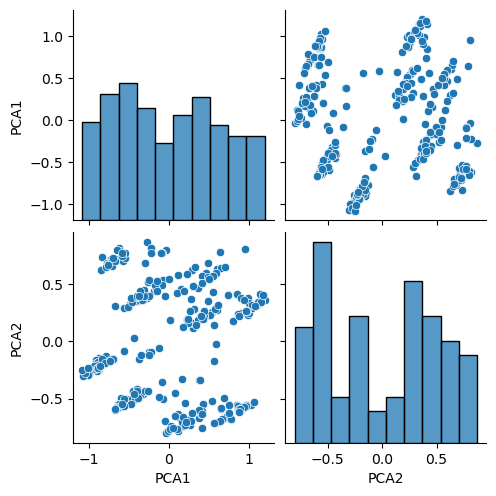

In [7]:
X_pca_2 = pd.DataFrame(X_pca_2, columns=['PCA1','PCA2'])
sns.pairplot(data=X_pca_2)

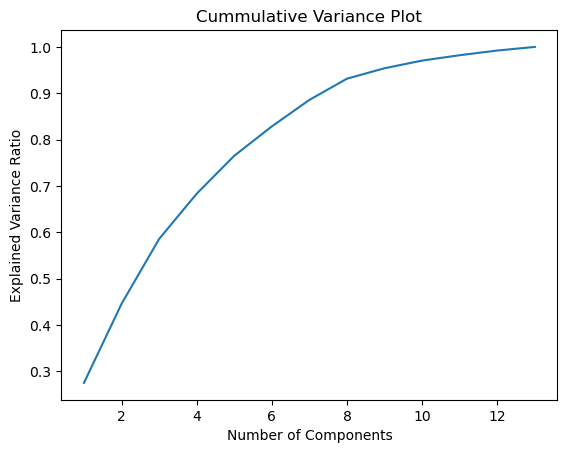

In [8]:
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cummulative_variance) + 1), cummulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Cummulative Variance Plot')
plt.show()

In [9]:
y = pd.DataFrame(y, columns=['num'])
df = pd.concat([X_pca_2, y], axis=1)
df.head()

,PCA1,PCA2,num
0,0.281781,0.372706,0.0
1,0.610184,0.633248,1.0
2,1.155983,0.348812,1.0
3,-0.314593,-0.457716,0.0
4,-0.838908,0.626962,0.0


In [10]:
df.to_csv('../data/heart_disease2.csv')